<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Práctico:-Recomendación-de-Artistas" data-toc-modified-id="Práctico:-Recomendación-de-Artistas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Práctico: Recomendación de Artistas</a></span><ul class="toc-item"><li><span><a href="#Actividades" data-toc-modified-id="Actividades-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Actividades</a></span></li><li><span><a href="#Ejercicio-1---Análisis-Exploratorio-de-Datos" data-toc-modified-id="Ejercicio-1---Análisis-Exploratorio-de-Datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ejercicio 1 - Análisis Exploratorio de Datos</a></span></li><li><span><a href="#Ejercicio-2---Sistema-de-Recomendación" data-toc-modified-id="Ejercicio-2---Sistema-de-Recomendación-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ejercicio 2 - Sistema de Recomendación</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-2a---Filtrados-Colaborativos" data-toc-modified-id="Ejercicio-2a---Filtrados-Colaborativos-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ejercicio 2a - Filtrados Colaborativos</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-Usuario-Contenido" data-toc-modified-id="Matriz-de-Usuario-Contenido-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Matriz de Usuario-Contenido</a></span></li><li><span><a href="#Entrenamiento-del-algoritmo-de-recomendación" data-toc-modified-id="Entrenamiento-del-algoritmo-de-recomendación-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Entrenamiento del algoritmo de recomendación</a></span></li></ul></li><li><span><a href="#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados" data-toc-modified-id="Ejercicio-2b---Sistemas-de-Recomendación-Avanzados-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Ejercicio 2b - Sistemas de Recomendación Avanzados</a></span></li></ul></li></ul></li></ul></div>

# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [1]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
artists = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\artists.dat", sep="\t")
user_artist = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_artists.dat", sep="\t")
tags = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\tags.dat", sep="\t", encoding = 'unicode_escape', engine ='python')
user_friends = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_friends.dat", sep="\t", encoding = 'unicode_escape', engine ='python')
user_taggedartists = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_taggedartists.dat", sep="\t", encoding = 'unicode_escape', engine ='python')
user_taggedartists_timestamps = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_taggedartists_timestamps.dat", sep="\t")

In [4]:
#artist_data = pd.read_csv("../data/lastfmt/artists.dat", sep="\t")
artist_data = artists
artist_data.head()
#len(artist_data)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [5]:
#user_artist_plays = pd.read_csv("../data/lastfm/user_artists.dat", sep="\t")
user_artist_plays = user_artist

user_artist_plays.head()
#len(user_artist_plays)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [6]:
tags.sample(5)

,tagID,tagValue
9308,9823,rock me babe
11311,11956,jet set radio future
9678,10212,musikfuerrundumdieuhr
6713,6999,wicked
350,357,dance pop


In [7]:
user_taggedartists.sample(5)
#len(user_taggedartists)

,userID,artistID,tagID,day,month,year
116940,1316,15100,8517,1,7,2008
83421,922,54,18,1,9,2008
134679,1566,207,195,1,5,2009
7049,61,421,84,1,7,2009
97038,1074,3431,25,1,7,2007


In [8]:
user_friends.sample(5)

,userID,friendID
22192,1780,1272
15657,1215,1605
12526,959,1213
1831,139,1895
10616,797,120


In [9]:
user_taggedartists_timestamps

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000
...,...,...,...,...
186474,2100,16437,4,1277935200000
186475,2100,16437,292,1272664800000
186476,2100,16437,2087,1277935200000
186477,2100,16437,2801,1272664800000


In [10]:
df2 =user_taggedartists.merge(tags, left_on='tagID', right_on='tagID' , how='left')
#df2 = df2.merge(user_friends, left_on='userID', right_on='userID' , how='left')


## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando (quienes estén realizando la materia completa, en realidad pueden realizar ambas opciones si así lo desean).

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [11]:
#df1 = artist_data.merge(user_artist_plays, left_on='id', right_on='userID' , how='inner')
df1 =user_artist_plays.merge(artist_data, left_on='userID', right_on='id' , how='left')

In [12]:
df1 = df1.drop(['id','url','pictureURL'], axis=1)


In [13]:
print('Dataset shape: {}'.format(df1.shape))
print('-Dataset examples-')
print(df1.iloc[::10000, :])

Dataset shape: (92834, 4)
-Dataset examples-
       userID  artistID  weight              name
0           2        51   13883   Diary of Dreams
10000     215       230      15      Jeff Buckley
20000     434      5152       8             Spoon
30000     657      1904     996   Paolo Meneguzzi
40000     877     10777     236        Alphaville
50000    1111       825    2218             Tenhi
60000    1349      1700     328  Rhapsody of Fire
70000    1578       461     144     Анна Седокова
80000    1807     16802       3      The Runaways
90000    2035      6910     150   Steve Jablonsky


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92834 entries, 0 to 92833
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userID    92834 non-null  int64 
 1   artistID  92834 non-null  int64 
 2   weight    92834 non-null  int64 
 3   name      92269 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.5+ MB


In [15]:
n_ratings = len(df1)
n_artist = df1['artistID'].nunique()
n_users = df1['userID'].nunique()

print(f"Numero de Listens: {n_ratings}")
print(f"Numero de Artistas únicos : {n_artist}")
print(f"Numero de Usuarios únicos : {n_users}")
print(f"Promedio de Listens por usuario : {round(n_ratings/n_users, 2)}")
print(f"Promedio de Listens por Artistas : {round(n_ratings/n_artist, 2)}")

Numero de Listens: 92834
Numero de Artistas únicos : 17632
Numero de Usuarios únicos : 1892
Promedio de Listens por usuario : 49.07
Promedio de Listens por Artistas : 5.27


### Listen por users

In [252]:
df1.groupby('userID')['weight'].sum().reset_index().sort_values('weight', ascending=False)[:10]


,userID,weight
698,757,480039
1790,2000,468409
1273,1418,416349
1475,1642,388251
995,1094,379125
1739,1942,348527
1855,2071,338400
1818,2031,329980
476,514,329782
356,387,322661


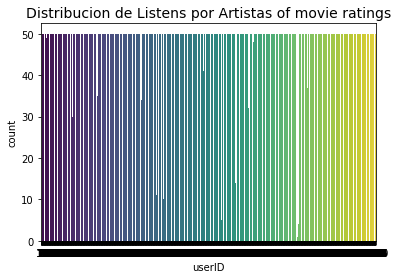

In [191]:
sns.countplot(x="userID", data=df, palette="viridis")
plt.title("Distribucion de Listens por Artistas of movie ratings", fontsize=14)
plt.show()

In [135]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df['weight'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#339933'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Artista-ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

AttributeError: 'numpy.int64' object has no attribute 'sort_index'

NameError: name 'ticks_font' is not defined

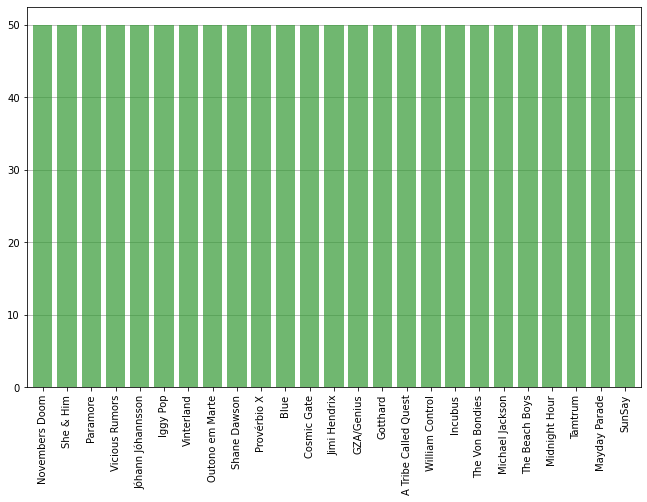

In [99]:
ax = artists_most.plot(kind='bar', figsize=[11, 7], width=0.8, alpha=0.7, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

#plt.savefig('images/lastfm-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [86]:
b = user_taggedartists.merge(tags, left_on='tagID', right_on='tagID')
b.head(1)

,userID,artistID,tagID,day,month,year,tagValue
0,2,52,13,1,4,2009,chillout


In [108]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = a['name'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / a.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#339933'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(a.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
go.Figure(data=[trace], layout=layout)
#plt.show()

Ranking de Distribución Por Artistas

In [199]:
a.groupby('name')['weight'].sum().reset_index().sort_values('weight', ascending=False).head(10)


,name,weight
369,Crystal Castles,480039
1859,いきものがかり,468409
1066,Mogwai,416349
76,Aliados 13,388251
857,Kent,379125
673,Guru Josh Project,348527
1038,Michael Giacchino,338400
195,Bee Gees,329980
728,Ill Niño,329782
1511,TRAX,322661


Artista menor Listens

In [200]:
mean_ratings = a.groupby('artistID')[['weight']].mean()
lowest_rated = mean_ratings['weight'].idxmin()
a[a['artistID'] == lowest_rated]

,name,userID,artistID,weight
5244,Nebulo,115,2897,1


Artista mayor Listens

In [201]:
mean_ratings = a.groupby('artistID')[['weight']].mean()
highest_rated = mean_ratings['weight'].idxmax()
a[a['artistID'] == highest_rated]

,name,userID,artistID,weight
27223,The Montesas,596,8388,35323


In [109]:
a.sample(5)

,name,userID,artistID,weight
86663,O.S.T.R.,1975,17973,322
5136,Dustin O'Halloran,113,2838,3036
19606,Wolf Parade,431,190,3325
25480,Southern Culture on the Skids,559,208,241
42668,Kiko Loureiro,950,11301,143


In [96]:
artists_most = a['name'].value_counts().head(25)
artists_most.head()


Novembers Doom       50
She & Him            50
Paramore             50
Vicious Rumors       50
Jóhann Jóhannsson    50
Name: name, dtype: int64

Artists ratings analysis

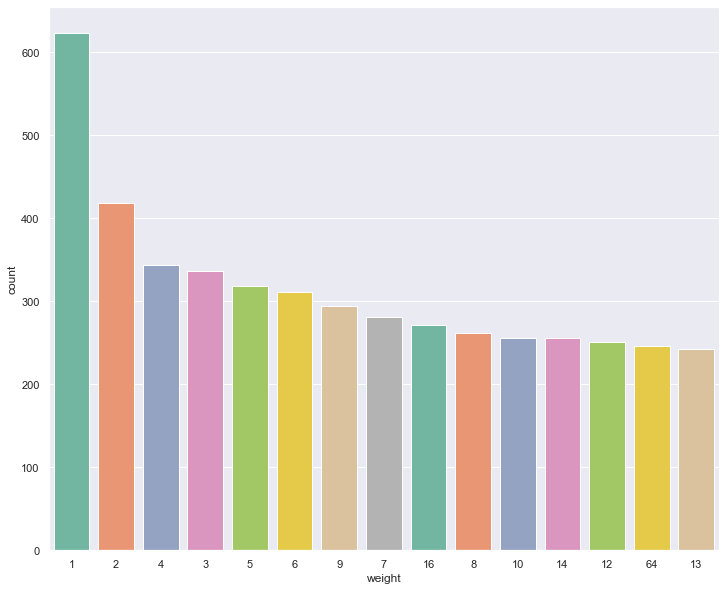

In [216]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="weight", data=a, palette="Set2", order=a['weight'].value_counts().index[0:15])

In [217]:
user_taggedartists.head(1)

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009


Analisis por Año

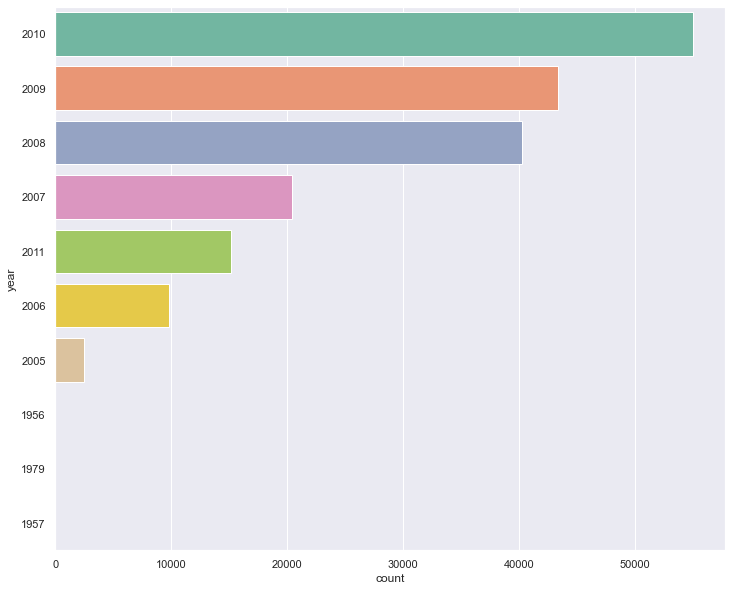

In [218]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=user_taggedartists, palette="Set2", order=user_taggedartists['year'].value_counts().index[0:15])

In [226]:
df1.head(1)

,name,userID,artistID,weight
0,Diary of Dreams,2,51,13883


In [18]:
user_count = pd.pivot_table(df1,index="userID",values="artistID",aggfunc="count").sort_values(by ='artistID',ascending=False)
#user_count = pd.pivot_table(df,index="userId",values="plays",aggfunc="sum").sort_values(ascending=False)
user_count

,artistID
userID,
2,50
1376,50
1388,50
1387,50
1386,50
...,...
2085,1
1758,1
615,1


## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para quienes quieran aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa pueden optar por saltearse este ejercicio (aunque es recomendable pensarlo) y pasar directamente al [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [192]:
df = user_artist_plays
df.sample(4)

,userID,artistID,weight
63191,1424,225,333
64006,1442,814,327
20680,450,920,3179
38457,841,9928,20


#### Matriz de Usuario-Contenido

In [193]:
ArtistasRatings = df.pivot_table(index=['userID'],columns=['artistID'],values='weight')  
ArtistasRatings.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Entrenamiento del algoritmo de recomendación

In [194]:
reader = Reader(rating_scale=(df.weight.min(), df.weight.max()))

data = Dataset.load_from_df(df[["userID", "artistID", "weight"]], reader)

#data = Dataset.load_from_df(df_new[['userID', 'ISBN', 'bookRating']], reader)

In [211]:
ratings_train, ratings_test = train_test_split(data, test_size=0.2)
model = KNNWithMeans(k=5).fit(ratings_train)
predictions = model.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 4927.3306


In [213]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, data , measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5170.67733542.50084416.87394466.21194249.90444369.2337519.9448
MAE (testset)     824.8654787.8646821.1742827.5256830.0770818.301415.5015 
Fit time          1.07    1.12    1.09    1.11    1.09    1.10    0.02    
Test time         2.77    2.89    2.99    3.27    2.87    2.96    0.17    


In [195]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [202]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


In [203]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,3646.924181,0.319560,0.372245
CoClustering,3661.657807,7.045208,0.407398
SlopeOne,3734.899520,13.917642,2.764202
NMF,3790.829145,11.499703,0.471507
KNNBaseline,4125.705789,1.072331,8.241448
KNNWithMeans,4438.696174,0.833911,6.821870
KNNBasic,4469.865526,0.787260,6.715794
KNNWithZScore,4484.552759,1.013301,7.373168
NormalPredictor,4608.291697,0.237630,0.513508


In [210]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = NormalPredictor(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS


TypeError: __init__() got an unexpected keyword argument 'bsl_options'

In [205]:

trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 3074.8203


3074.82026200131

In [206]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)


In [161]:
df.head(1)

,uid,iid,rui,est,details,Iu,Ui,err
0,157,2343,125.0,239.565973,{'was_impossible': False},36,58,114.565973


In [207]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [208]:
best_predictions


,uid,iid,rui,est,details,Iu,Ui,err
11505,1310,2815,1.0,1.0,{'was_impossible': False},40,20,0.0
23057,768,685,1.0,1.0,{'was_impossible': False},32,5,0.0
1346,499,1892,1.0,1.0,{'was_impossible': False},43,22,0.0
14773,1310,3110,1.0,1.0,{'was_impossible': False},40,27,0.0
17356,229,2024,1.0,1.0,{'was_impossible': False},34,10,0.0
12978,72,306,1.0,1.0,{'was_impossible': False},33,226,0.0
11110,1310,2276,1.0,1.0,{'was_impossible': False},40,8,0.0
20776,1773,405,1.0,1.0,{'was_impossible': False},7,28,0.0
10972,712,309,1.0,1.0,{'was_impossible': False},28,24,0.0
22454,1818,8312,1.0,1.0,{'was_impossible': False},42,4,0.0


In [209]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
17667,840,614,63627.0,1873.689953,{'was_impossible': False},33,99,61753.310047
22561,957,2179,64223.0,2172.968758,{'was_impossible': False},33,24,62050.031242
11982,1236,614,69301.0,3191.804342,{'was_impossible': False},34,99,66109.195658
5289,717,289,72776.0,4276.641888,{'was_impossible': False},40,388,68499.358112
5460,298,903,73771.0,1494.510201,{'was_impossible': False},40,139,72276.489799
4155,1339,65,78496.0,3404.151515,{'was_impossible': False},33,272,75091.848485
18577,2069,486,109484.0,914.936113,{'was_impossible': False},35,158,108569.063887
9255,1368,486,125471.0,817.018456,{'was_impossible': False},36,158,124653.981544
7505,938,378,129595.0,2537.216231,{'was_impossible': False},32,167,127057.783769
6857,1905,203,257978.0,407.986471,{'was_impossible': False},31,94,257570.013529


### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

In [ ]:
# Completar...